## Fruit's 2019 prices analysis 

Analysis of 2019 fruit prices in Mercado Central de Buenos Aires.

Prices are in USD to exclude ARS inflation effects.

## Libraries

In [18]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%matplotlib notebook

## Data manipulation

Import, clean and prepare vegetables and dolar datasets.

In [19]:
# Import fruit dataset
filename = Path(Path.cwd().joinpath('data','dataset.csv'))
dataset = pd.read_csv(filename)

# Import dolar dataset
dolar_filename = Path(Path.cwd().joinpath('data','Datos históricos USD_ARS.csv'))
dolar = pd.read_csv(dolar_filename, decimal= ',')

# Fruits dataset transformation
# Data type 
dataset['date'] = pd.to_datetime(dataset['date'], infer_datetime_format=True)

# Dataset ordering
dataset = dataset.sort_values(by='date')

# Quantity of data per item
quantity = dataset.groupby('item', as_index = False).count()
errors = quantity.loc[quantity['date'] < 5]['item']

# Remove errors
dataset = dataset[~dataset['item'].isin(errors)]


# Dolar Dataset transformation

# Column selection
dolar = dolar[['Fecha','Último']]
# Data type 
dolar['Fecha'] = pd.to_datetime(dolar['Fecha'], infer_datetime_format = True)

# Rename columns
dolar = dolar.rename(columns={'Fecha': 'date_dolar',"Último": "exchange_rate"})

# Merge vegetable and dolar datasets
dataset = dataset.merge(dolar, left_on='date', right_on='date_dolar')
dataset = dataset.drop(['date_dolar'], axis = 1)

# # Calculate fruit price in USD 
dataset['price_usd'] = dataset['average_kg_price'] / dataset['exchange_rate']
dataset.head()

,date,item,average_kg_price,exchange_rate,price_usd
0,2019-01-02,PERA,24.984000,37.769,0.661495
1,2019-01-02,KIWI,76.690714,37.769,2.030520
2,2019-01-02,LIMA,73.335000,37.769,1.941672
3,2019-01-02,LIMON,19.186111,37.769,0.507986
4,2019-01-02,MAMON,58.397500,37.769,1.546175


## Plot

In [20]:
def plot_item(item,dataset, spines = False, axis = False):
    '''
    Creates a plot on item's price per year
    Parameters
    ---------
    item (string): vegetable to plot
    dataset(dataframe): dataset with item and price_usd columns
    spines(bool): False by default, if True spines are shown
    axis(bool): False by default, if True axis are shown
    Returns
    -------
    Axes (plot): Timeseries plot with price per day
    '''
    df = dataset.loc[dataset['item'] == item]
    
    ax.spines["top"].set_visible(spines)    
    ax.spines["bottom"].set_visible(spines)    
    ax.spines["right"].set_visible(spines)    
    ax.spines["left"].set_visible(spines) 

    ax.axis(axis)
    
    ax.text(0, 0.5, item, horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)
    

    ax.plot(df['date'],df['price_usd'], color = 'red')
    
    return ax

<IPython.core.display.Javascript object>


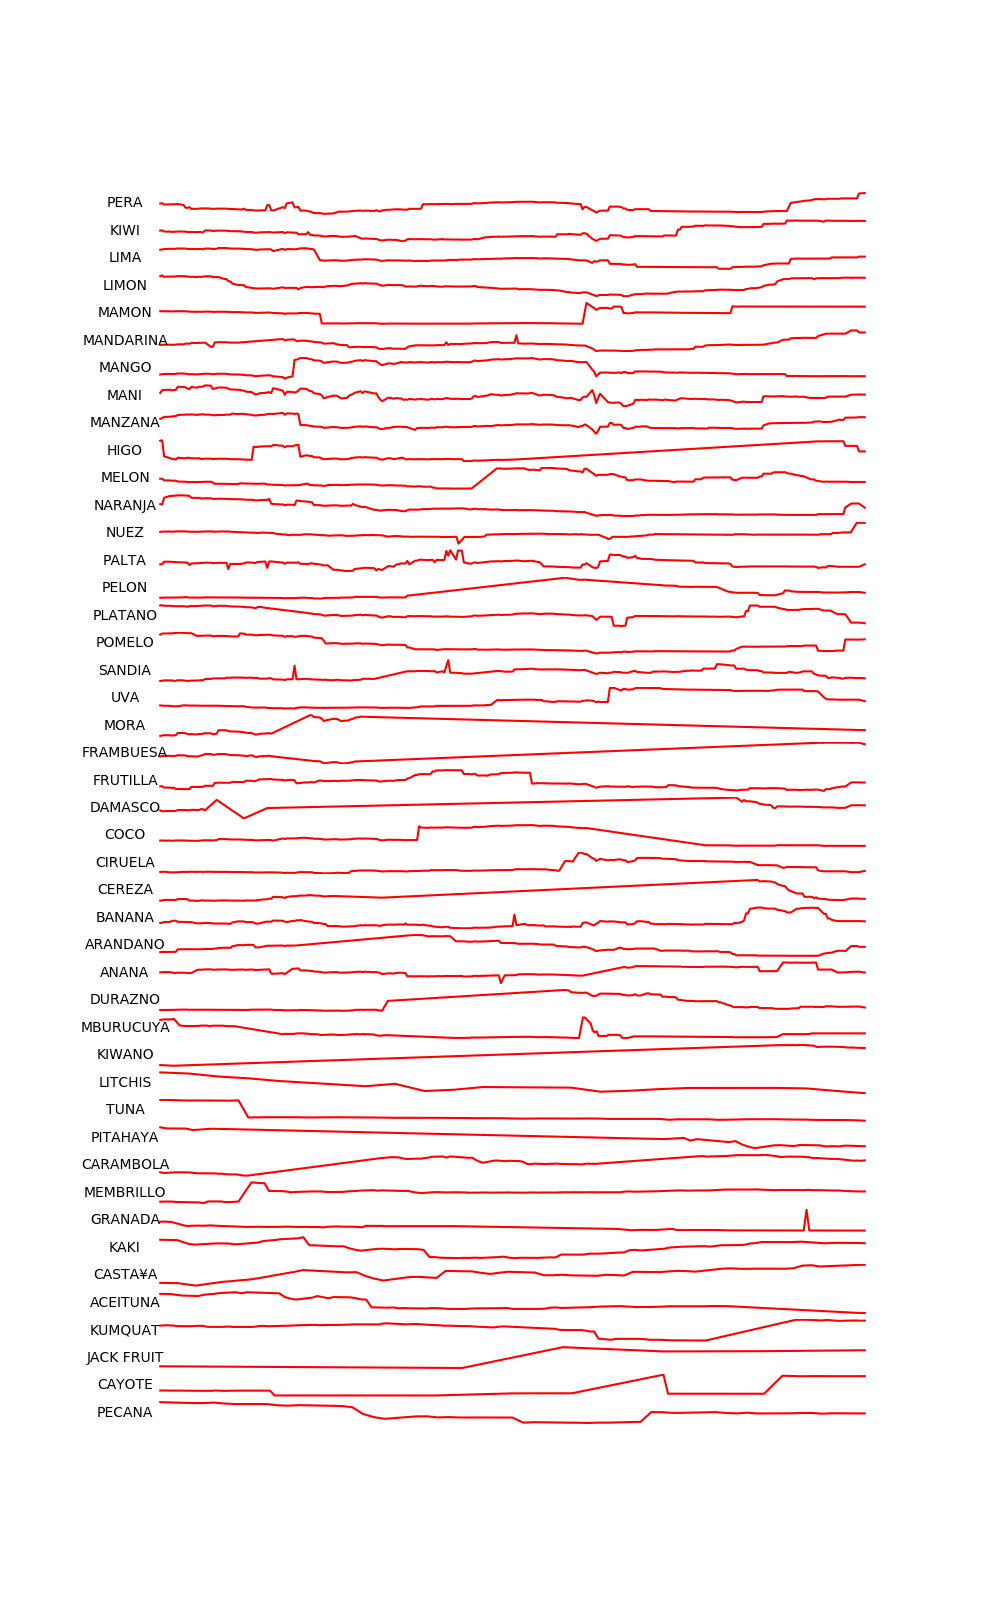

In [21]:
# List all items for analysis
items = dataset['item'].unique()

# Plot
fig, axs = plt.subplots(nrows = len(items), ncols= 1, figsize = (10,16))

# Iterate through items
for item,ax in zip(items,axs):
    plot_item(item,dataset)

In [22]:
# Save plot
fig.savefig('plots/fruits.png')

### Plot the 5 chepeast vegables per month

In [23]:
# Add month column
dataset['month'] = dataset['date'].dt.month

# Calculate mean price per item per month
data = dataset.groupby(('month','item'), as_index = False).mean().sort_values(by=['month','price_usd'])

# Rank items - chepeast first
data['ranking'] = data.groupby('month')['price_usd'].rank('first')

# Select 5 cheapest fruit per month
data = data.loc[data['ranking'] <= 5 ]

/Users/mac/anaconda3/envs/mercado_central/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """


In [24]:
# Match fruit icon and vegetable path
sandia_path = 'icons/watermelon.png'
mandarina_path = 'icons/tangerine.png'
limon_path = 'icons/lemon.png'
naranja_path = 'icons/orange.png'
cayote_path = 'icons/cayote.png'
pera_path = 'icons/pear.png'
membrillo_path = 'icons/quince.png'
pomelo_path = 'icons/grapefruit.png'
kumquat_path = 'icons/kumquat.png'

In [25]:
# Functions
def set_path(row):
    '''
    Identifies path for each row
    
    Parameters
    ---------
    row: Row in dataset
    Returns
    -------
    path(string): Path to icon that corresponds to each row
    '''
    if row["item"] == "SANDIA":
        return sandia_path
    elif row["item"] == "MANDARINA":
        return mandarina_path
    elif row["item"] == "LIMON":
        return limon_path
    elif row["item"] == "NARANJA":
        return naranja_path
    elif row["item"] == "CAYOTE":
        return cayote_path
    elif row["item"] == "PERA":
        return pera_path
    elif row["item"] == "MEMBRILLO":
        return membrillo_path
    elif row["item"] == "POMELO":
        return pomelo_path
    elif row["item"] == "KUMQUAT":
        return kumquat_path
    else:
        return "no path"
    
def getImage(path):
    '''
    Converts png icon to an object to print on top of plot
    Parameters
    ----------
    path (string): Path/ Directory where png is stored
    Returns
    ------
    Offsetimage: Object to locate on top of plot
    '''
    return OffsetImage(plt.imread(path))


<IPython.core.display.Javascript object>


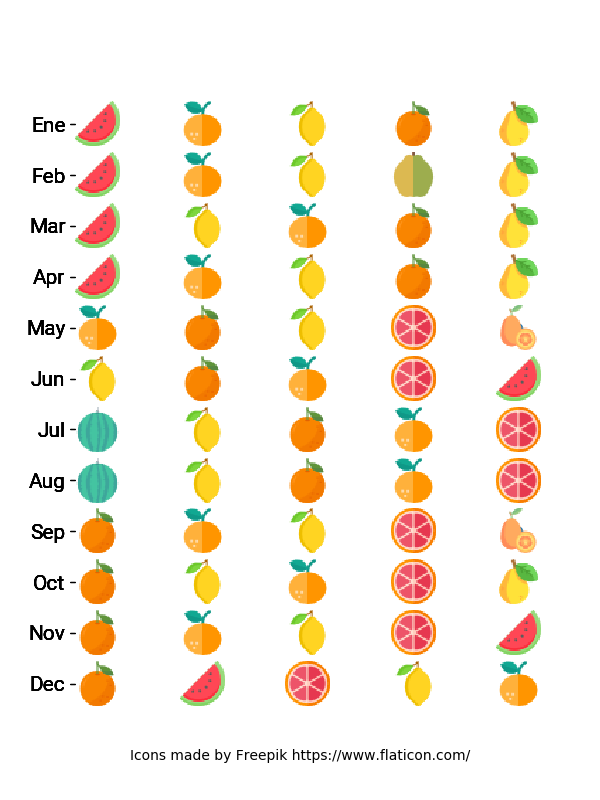

In [26]:
# Plot

# Create column with path to icon for each vegetable
data = data.assign(path=data.apply(set_path, axis=1))

# Generate y axis label
labels = ['Ene','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
labels = list(itertools.chain.from_iterable(itertools.repeat(x, 5) for x in labels))

# Define x, y variables and icons
paths = data.path
y = data.month
x = data.ranking

# Axes settings
fig, ax = plt.subplots(figsize = (6,8))
ax.scatter(x, y) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)

# Iterate items and generate plot
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
          
# Flaticon credits
txt = 'Icons made by Freepik https://www.flaticon.com/'
fig.text(.5, .05, txt, ha='center')
    
# Plot settings
plt.yticks(y, labels, fontname = 'Roboto')
plt.tick_params(labelsize=15)
plt.gca().invert_yaxis()


In [27]:
# Save plot
fig.savefig('plots/fruits_icons.png')

###  Most stable and unstable prices across the year

In [34]:
# Aggreagate data at item level and count days the vegetable was available
dataset_days_available = dataset.groupby('item', as_index = False)['date'].count()

# Select fruits that were available at least 200 days in the year(total market open days is 245)
dataset_days_available = dataset_days_available.loc[dataset_days_available['date'] > 200]

# Dataset with fruits all-year availablity (Standard deviation)
stable_vegetables = dataset.merge(dataset_days_available, left_on='item', right_on='item')
stable_vegetables = stable_vegetables[['item','price_usd']].groupby('item').std().sort_values(by='price_usd').head(5)
stable_vegetables.rename(columns = {'price_usd':'std_price_usd'})

,std_price_usd
item,
MANI,0.064239
MANDARINA,0.078444
LIMON,0.089876
PERA,0.106925
MANZANA,0.120393


In [36]:
# Fruits with the largest price unstability (Standard deviation)
unstable = dataset[['item','price_usd']].groupby('item').std().sort_values(by='price_usd', ascending = False).head(5)
unstable.rename(columns = {'price_usd':'std_price_usd'})

,std_price_usd
item,
ARANDANO,2.724905
CEREZA,1.263020
FRAMBUESA,1.157245
CAYOTE,1.096993
UVA,0.976655
